# Classification Performance Estimation
A typical measure to assess the performance of a classifier is the confusion matrix. For each class, this matrix shows the predicted class for each sample with that class. 

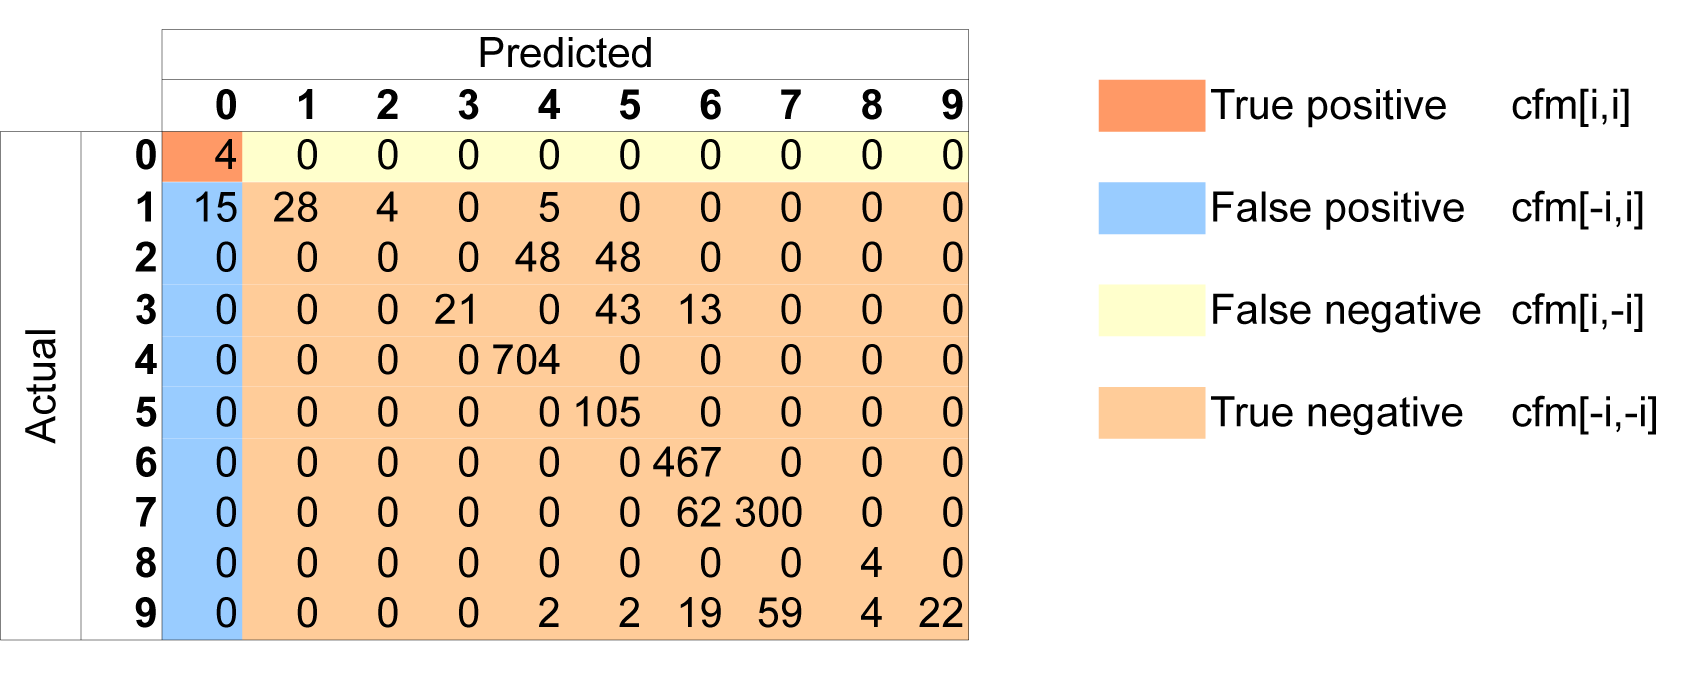

## Exercise 1
Implement a function `cfm(truth,est)` that returns the confusion matrix, given two arrays `truth` and `est`. Plot the confusion matrix, and compute accuracy, precision, recall and F1 score from the confusion matrix.



In [16]:
import numpy as np
import pandas as pd
from scipy.io import arff

def cfm(truth,est):
    cs = np.unique(np.concatenate((truth,est)))
    cm = np.zeros([len(cs),len(cs)])
    for i in range(len(cs)):
        for j in range(len(cs)):
            ci = cs[i]
            cj = cs[j]
            cm[i,j] = sum((truth == ci) & (est == cj))/len(truth)
    return cm


## The Iris dataset
A dataset that is commonly used for testing classifiers is the iris dataset, that contains features of three different types of iris flowers. 

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv("iris.csv").iloc[:,1:6]
df

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

## Exercise 2

In Scipy, a number of classifiers is already implemented. In the following, you should compare the performance of those classifiers for the activity recognition dataset we looked at earlier (you can use the precomputed features from `features1.arff`). Use 3/4 of the data as training data, and 1/4 as test data. Train the classifiers on the training data, and return the accuracy, as well as plots of the confusion matrices, computed on the test data. Use the folowing classifiers: Decision tree, linear discriminant analysis, quadratic discriminant analysis, support vector machine.



/home/stefan/anaconda3/envs/ki2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.9523809523809523,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762]

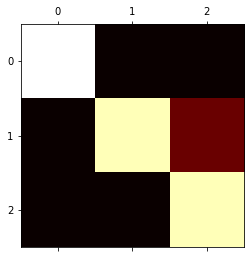

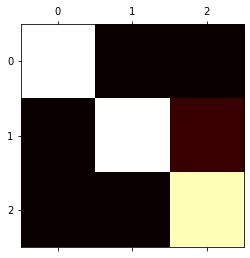

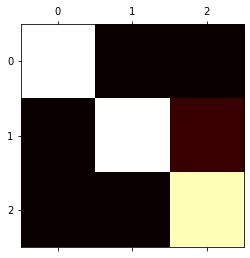

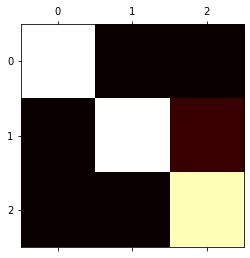

In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tt = np.random.choice(np.arange(2),150,p=np.array([3/4,1/4]),replace=True)
train = df.iloc[tt==0,:]
test = df.iloc[tt==1,:]

y = train["Name"].astype("str")
y_test = test["Name"].astype("str")

classfs = [DecisionTreeClassifier(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),LinearSVC()]
def getAcc(clf):
    clf = clf.fit(train.iloc[:,range(0,4)],y)
    y_pred = clf.predict(test.iloc[:,range(0,4)])
    cm = cfm(y_test,y_pred)
    plt.matshow(cm,cmap='hot')
    
    return (sum(y_test == y_pred)/len(y_pred))

accs = [getAcc(clf) for clf in classfs]
accs

In [30]:
np.random.choice?